In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

orders_df = pd.read_csv("./orders.csv", sep=";")
orders_products_df = pd.read_csv("./orders_products.csv", sep=";")
products_df = pd.read_csv("./products.csv", sep=";")
route_segments_df = pd.read_csv("./route_segments.csv", sep=";")

In [157]:
wastedT_df = pd.read_csv("./drivers_wasted.csv")
avg_del_by_driver = pd.read_csv("./drivers_avg_delivery_data.csv")
avg_del_by_sector = pd.read_csv("setor_avg_delivery_data.csv")

In [158]:
wastedT_df

,driver_id,WastedTime,avg_WastedTimeByStop,stops_count
0,1,1891499,2598.2129,728
1,2,796593,1270.4833,627
2,3,1031717,1438.9358,717
3,4,1025336,1548.8459,662


In [159]:
avg_del_by_driver

,sector_id,driver_id,avg_deliveryTime,amount_orders,avg_order_weight
0,1,1,185.9463,205,6694.3463
1,1,2,693.0000,183,6660.3060
2,1,3,1226.3616,177,6237.8531
3,1,4,1889.7471,174,6839.4483
4,2,1,644.9565,161,6849.3602
5,2,2,742.5326,184,6295.1250
6,2,3,853.3065,199,5987.1709
7,2,4,5251.3795,195,6611.0154
8,3,1,4406.0968,217,6519.0230
9,3,2,10433.1325,166,6430.3373


In [160]:
avg_del_by_sector

,sector_id,avg_deliveryTime,amount_orders
0,1,961.8674,739
1,2,1940.8539,739
2,3,3784.2965,779


In [161]:
rs_o_df = route_segments_df.merge(orders_df, how="left", on="order_id")
rs_o_df["delivery_time"]=(pd.to_datetime(rs_o_df['segment_end_time']) - pd.to_datetime(rs_o_df['segment_start_time'])).dt.total_seconds()

# rs_o_df

In [162]:
grouped = rs_o_df[(rs_o_df['segment_type'] == "STOP") & (rs_o_df['sector_id'] == 1) & (rs_o_df['driver_id'] == 1)]
grouped

,segment_id,driver_id,segment_type,order_id,segment_start_time,segment_end_time,customer_id,sector_id,planned_delivery_duration,delivery_time
6,6,1,STOP,0,2024-02-24 20:03:27,2024-02-24 20:20:43,116,1,176,1036.0
12,12,1,STOP,2221,2024-02-16 04:37:40,2024-02-16 04:40:06,284,1,176,146.0
14,14,1,STOP,0,2024-02-16 04:16:00,2024-02-16 04:28:51,116,1,176,771.0
40,40,1,STOP,2129,2024-02-23 20:35:49,2024-02-23 20:36:38,68,1,177,49.0
73,73,1,STOP,0,2024-02-11 07:34:57,2024-02-11 07:52:56,116,1,176,1079.0
...,...,...,...,...,...,...,...,...,...,...
4890,4890,1,STOP,1699,2024-02-03 09:20:02,2024-02-03 09:21:25,294,1,170,83.0
4914,4914,1,STOP,0,2024-02-26 06:22:01,2024-02-26 06:33:06,116,1,176,665.0
4915,4915,1,STOP,2078,2024-02-05 19:14:14,2024-02-05 19:15:30,59,1,175,76.0
4949,4949,1,STOP,0,2024-02-01 05:07:48,2024-02-01 05:19:08,116,1,176,680.0


{'Driver 1': [3.099105, 10.749275, 73.43494666666668], 'Driver 2': [11.55, 12.375543333333333, 173.88554166666665], 'Driver 3': [20.43936, 14.221775000000001, 7.232358333333334], 'Driver 4': [31.495785, 87.52299166666667, 14.920245]} {'Driver 1': [205, 161, 217], 'Driver 2': [183, 184, 166], 'Driver 3': [177, 199, 205], 'Driver 4': [174, 195, 191]} {'Driver 1': [6.6943463, 6.8493602000000005, 6.519023], 'Driver 2': [6.660305999999999, 6.295125, 6.4303373], 'Driver 3': [6.237853100000001, 5.9871709, 6.4897317], 'Driver 4': [6.8394483, 6.6110154, 6.9732513]}


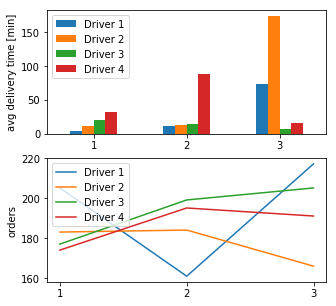

In [187]:
sectors = avg_del_by_driver["sector_id"].unique()
drivers = avg_del_by_driver["driver_id"].unique()
avg_dt_s = avg_del_by_driver["avg_deliveryTime"].to_list()
dt_set = {}
aorders_set = {}
order_weight_set = {}
for driver_id in drivers:
    dt_set["Driver " + str(driver_id)] = (avg_del_by_driver[avg_del_by_driver["driver_id"] == driver_id].sort_values("sector_id")["avg_deliveryTime"] / 60).to_list()
    aorders_set["Driver " + str(driver_id)] = avg_del_by_driver[avg_del_by_driver["driver_id"] == driver_id].sort_values("sector_id")["amount_orders"].to_list()
    order_weight_set["Driver " + str(driver_id)] = (avg_del_by_driver[avg_del_by_driver["driver_id"] == driver_id].sort_values("sector_id")["avg_order_weight"] /1000).to_list()
    
print(dt_set, aorders_set, order_weight_set)
sf_plot = pd.DataFrame(dt_set, index=sectors)
ao_plot = pd.DataFrame(aorders_set, index=sectors)
fig, axes = plt.subplots(nrows=2)
fig.set_figheight(5)
fig.set_figwidth(5)
sf_plot.plot.bar(rot=0, ax=axes[0])
ao_plot.plot(ax=axes[1] )
axes[0].set_ylabel("avg delivery time [min]")
axes[1].set_ylabel("orders")
axes[1].set_xticks(sectors)

Text(0.5,0,'sector')

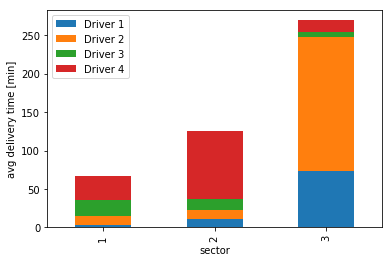

In [164]:
ax = sf_plot.plot.bar(stacked=True)
ax.set_ylabel("avg delivery time [min]")
ax.set_xlabel("sector")

Text(0.5,0,'sector')

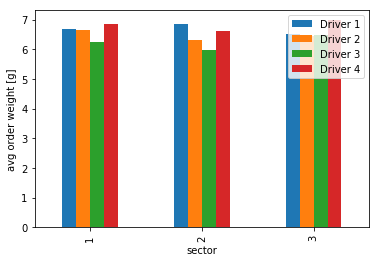

In [188]:
ow_plot = pd.DataFrame(order_weight_set, index=sectors)
ax = ow_plot.plot.bar()
ax.set_ylabel("avg order weight [g]")
ax.set_xlabel("sector")

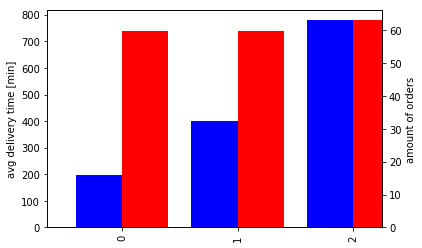

In [165]:
width = 0.4
fig = plt.figure()
ax1 = fig.add_subplot(111)
avg_del_by_sector["avg_deliveryTime"] = avg_del_by_sector["avg_deliveryTime"] /60 
# plt.xticks(np.arange(len(sectors)), sectors)

ax1.set_ylabel("avg delivery time [min]")

ax2 = ax1.twinx()
ax2.set_ylabel("amount of orders")

avg_del_by_sector.amount_orders.plot(kind='bar', color='red', ax=ax1,width=width, position=0)
avg_del_by_sector.avg_deliveryTime.plot(kind='bar', color='blue', ax=ax2, width=width, position=1)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb77ada3f98>,
      dtype=object)

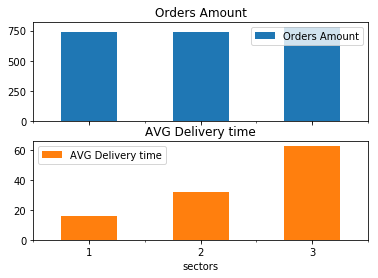

In [166]:
df_plot = pd.DataFrame({"Orders Amount": avg_del_by_sector["amount_orders"].to_list(), "AVG Delivery time": avg_del_by_sector["avg_deliveryTime"].to_list()}, index=sectors)
df_plot.plot.bar(rot=0, subplots=True, xlabel="sectors")


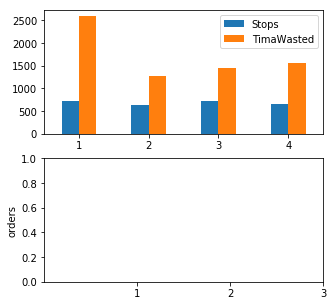

In [177]:
# wastedT_df.plot.bar()
wastedTime = wastedT_df["avg_WastedTimeByStop"].to_list()
drivers = wastedT_df["driver_id"].unique()
stops = wastedT_df["stops_count"].to_list()

dt_set = {"Stops": stops, "TimaWasted": wastedTime}
sf_plot = pd.DataFrame(dt_set, index=drivers)

fig, axes = plt.subplots(nrows=2)
fig.set_figheight(5)
fig.set_figwidth(5)
sf_plot.plot.bar(rot=0, ax=axes[0])
axes[1].set_ylabel("orders")
axes[1].set_xticks(sectors)

-- Select order_id, sum(weight * quantity) as order_weight from orders_products natural left join products group by order_id;
SELECT sector_id, driver_id, AVG((segment_end_time - segment_start_time)) / 60 as avg_deliveryTime, count(*) as amount_orders, order_weight, avg_order_weight  FROM droptime.route_segments natural left join orders natural left join 
( Select order_id, sum(weight * quantity) as order_weight, avg(weight * quantity) as avg_order_weight from orders_products natural left join products group by order_id ) as order_weight
 where segment_type = "STOP" and sector_id is not null group by sector_id, driver_id order by avg_deliveryTime DESC;